In [40]:
import mglearn
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [41]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)


In [42]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [43]:
lasso = Lasso().fit(X_train, y_train)
print("Training Set Score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of Non-Zero Coefficients:", np.sum(lasso.coef_ != 0))

Training Set Score: 0.29
Test Set Score: 0.21
Number of Non-Zero Coefficients: 4


In [44]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("Training Set Score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of Non-Zero Coefficients:", np.sum(lasso.coef_ != 0))

Training Set Score: 0.90
Test Set Score: 0.77
Number of Non-Zero Coefficients: 4


In [45]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("Training Set Score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of Non-Zero Coefficients:", np.sum(lasso.coef_ != 0))

Training Set Score: 0.95
Test Set Score: 0.64
Number of Non-Zero Coefficients: 4


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training Set Point: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test Set Point: {:.2f}".format(ridge01.score(X_test,y_test)))

Training Set Point: 0.93
Test Set Point: 0.77


Text(0, 0.5, 'Magnitude of Coefficients')

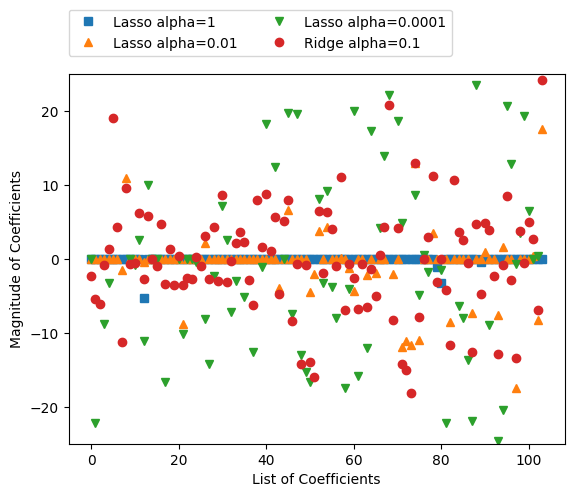

In [47]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("List of Coefficients")
plt.ylabel("Magnitude of Coefficients")

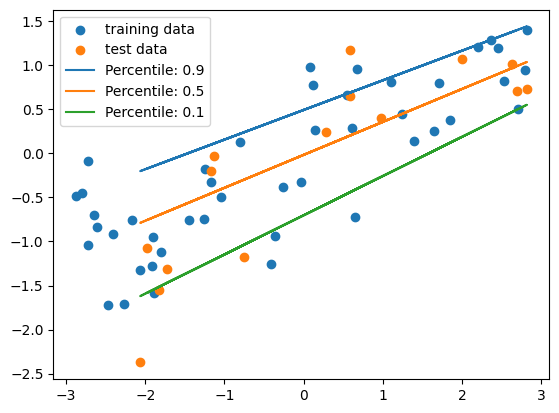

In [52]:
from sklearn.linear_model import QuantileRegressor
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train).predict(X_test)

plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.plot(X_test, pred_up, label='Percentile: 0.9')
plt.plot(X_test, pred_med, label='Percentile: 0.5')
plt.plot(X_test, pred_low, label='Percentile: 0.1')
plt.legend()           
plt.show()  

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


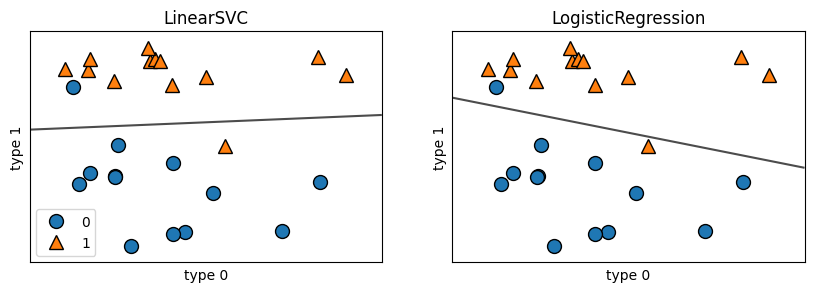

In [66]:
X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax, in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=False, eps=0.5,
                                    ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("type 0")
    ax.set_ylabel("type 1")
axes[0].legend()

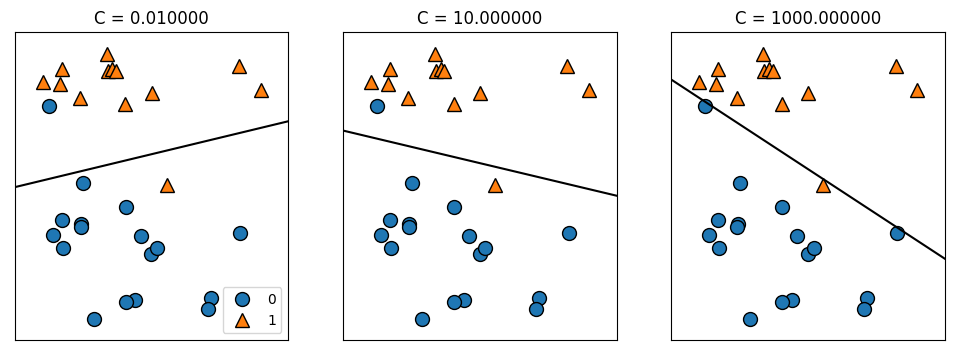

In [67]:
mglearn.plots.plot_linear_svc_regularization()

In [68]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("Training Set Point: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test Set Point: {:.3f}".format(logreg.score(X_test, y_test)))

Training Set Point: 0.958
Test Set Point: 0.958


In [72]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Training Set Point: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test Set Point: {:.3f}".format(logreg100.score(X_test, y_test)))

Training Set Point: 0.984
Test Set Point: 0.965


In [71]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("Training Set Point: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test Set Point: {:.3f}".format(logreg001.score(X_test, y_test)))

Training Set Point: 0.953
Test Set Point: 0.951


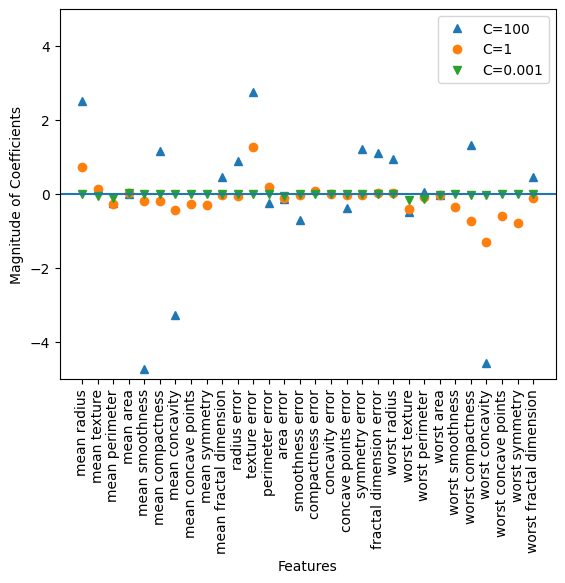

In [76]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Features")
plt.ylabel("Magnitude of Coefficients")
plt.legend()


C=0.001 Training Accuracy of L1 Logistic Regression: 0.91
C=0.001 Test Accuracy of L1 Logistic Regression: 0.92
C=1.000 Training Accuracy of L1 Logistic Regression: 0.96
C=1.000 Test Accuracy of L1 Logistic Regression: 0.96
C=100.000 Training Accuracy of L1 Logistic Regression: 0.99
C=100.000 Test Accuracy of L1 Logistic Regression: 0.98


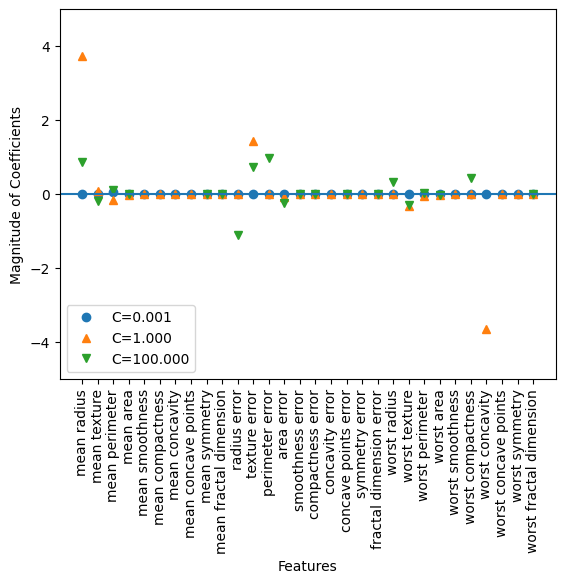

In [80]:
for C,marker in zip([0.001,1,100], ['o','^','v']):
    lr_l1 = LogisticRegression(solver = 'liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} Training Accuracy of L1 Logistic Regression: {:.2f}".format(
        C,lr_l1.score(X_train, y_train)))
    print("C={:.3f} Test Accuracy of L1 Logistic Regression: {:.2f}".format(
        C,lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))

    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("Features")
plt.ylabel("Magnitude of Coefficients")

plt.ylim(-5,5)
plt.legend(loc=3)

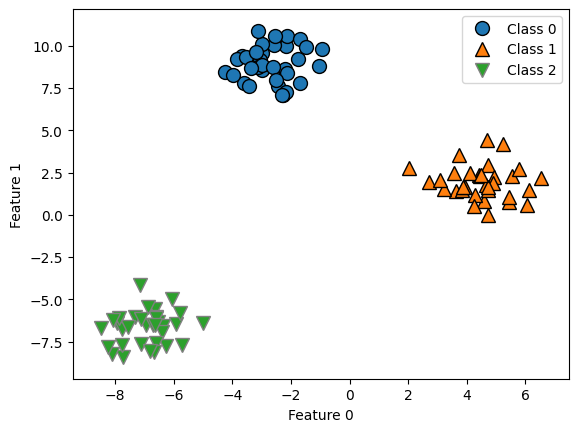

In [85]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [86]:
linear_svm = LinearSVC().fit(X,y)
print("Size of Coefficient Array: ", linear_svm.coef_.shape)
print("Size of Intercept Array: ", linear_svm.intercept_.shape)

Size of Coefficient Array:  (3, 2)
Size of Intercept Array:  (3,)


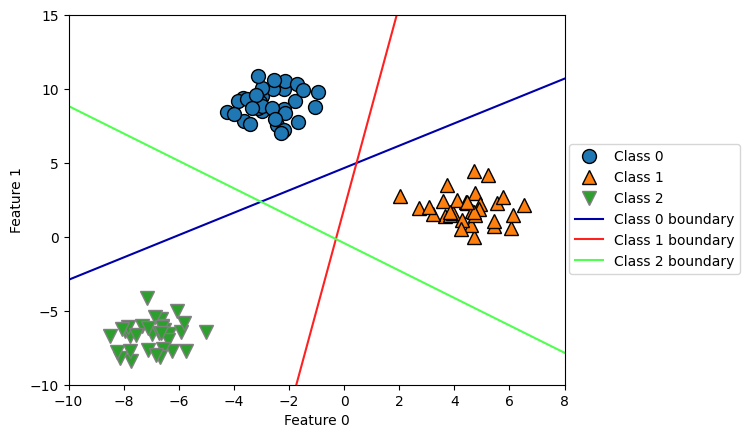

In [87]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 boundary', 'Class 1 boundary', 'Class 2 boundary'], loc=(1.01, 0.3))


Text(0, 0.5, 'Feature 1')

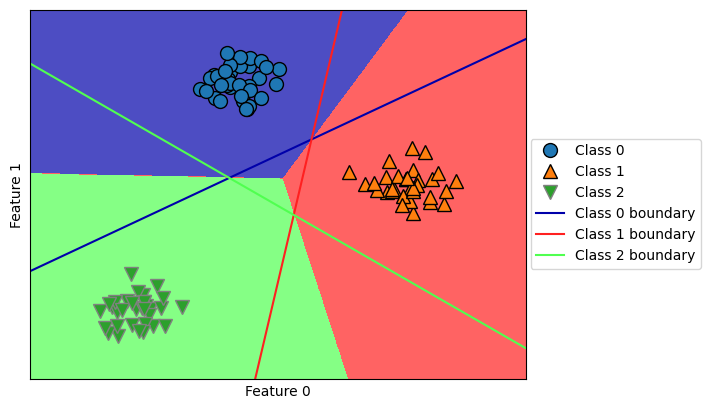

In [89]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c = color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 boundary', 'Class 1 boundary', 'Class 2 boundary'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


In [90]:
logreg = LogisticRegression().fit(X_train, y_train)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


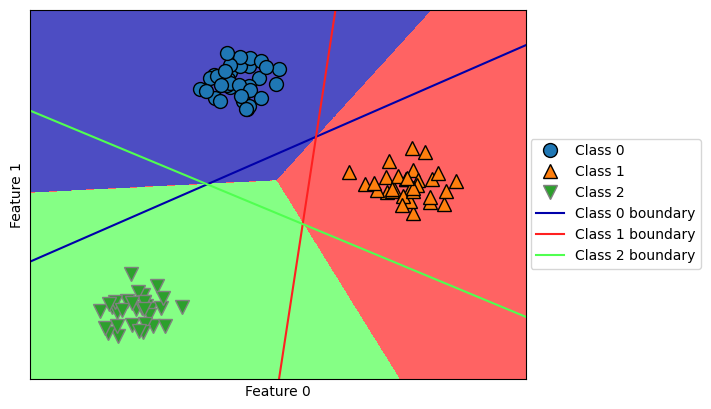

In [96]:
from sklearn.linear_model import SGDClassifier
sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=-1)
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 boundary', 'Class 1 boundary', 'Class 2 boundary'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


In [103]:
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)  
sgd_r.fit(X_train, y_train)

print("Training Set Score: {:.2f}".format(sgd_r.score(X_train, y_train)))  
print("Test Set Score: {:.2f}".format(sgd_r.score(X_test, y_test)))  


Training Set Score: 0.91
Test Set Score: 0.77


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [104]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

In [106]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)

print("Number of Features:\n", counts)

Number of Features:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


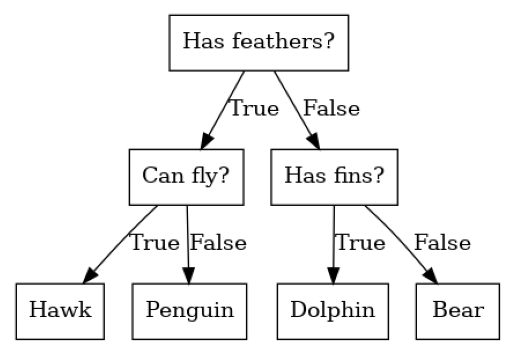

In [109]:
mglearn.plots.plot_animal_tree()

In [110]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Training Set Point: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Point: {:.3f}".format(tree.score(X_test, y_test)))

Training Set Point: 1.000
Test Set Point: 0.937


In [115]:
tree = tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)
print("Training Set Point: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Point: {:.3f}".format(tree.score(X_test, y_test)))

Training Set Point: 0.988
Test Set Point: 0.951


In [124]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)


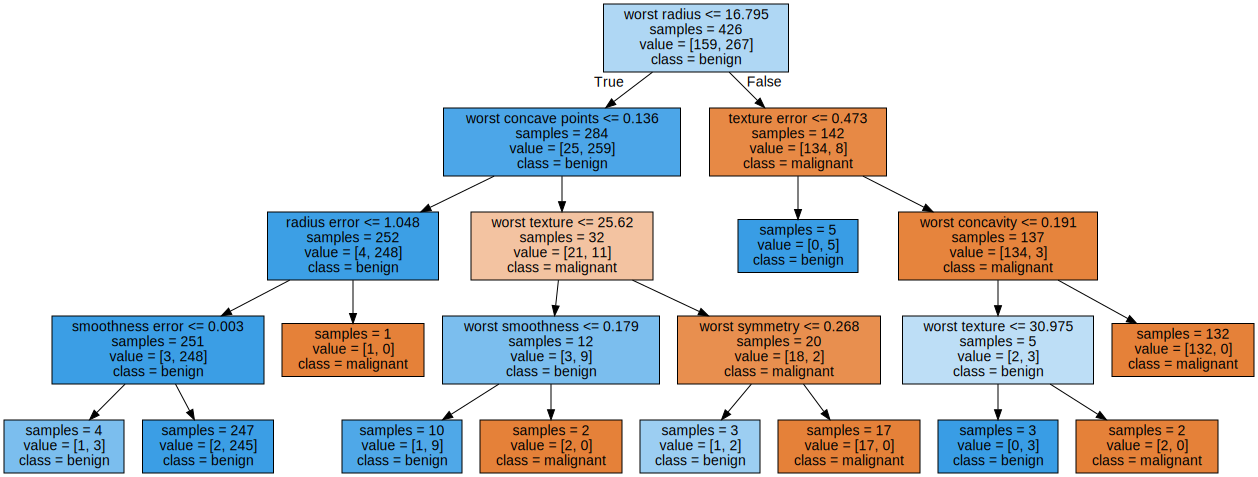

In [125]:
import graphviz

with open("tree.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

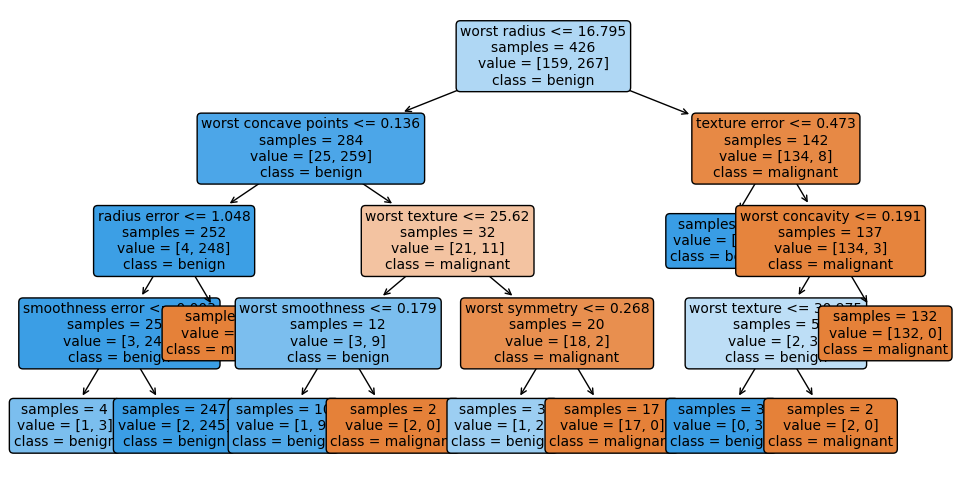

In [126]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["malignant", "benign"], feature_names=cancer.feature_names,
          impurity=False, filled = True, rounded=True, fontsize=10)
plt.show()

In [127]:
print("feature importance:\n", tree.feature_importances_)

feature importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


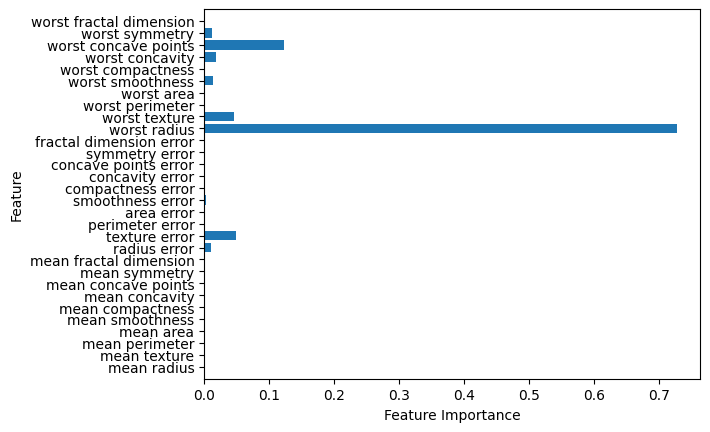

In [131]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance_cancer(tree)


Feature importances: [0. 1.]


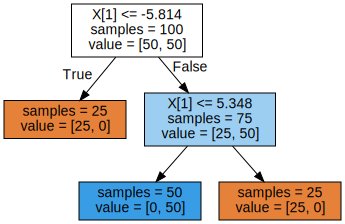

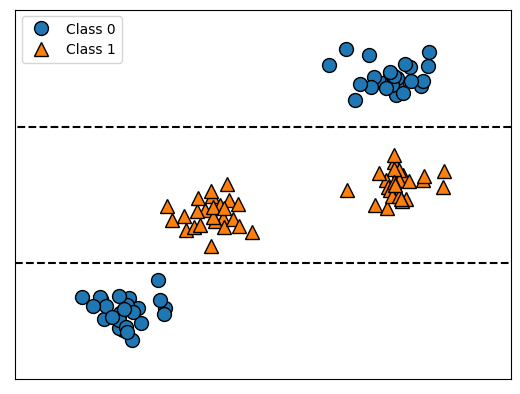

In [132]:
mglearn.plots.plot_tree_not_monotone()

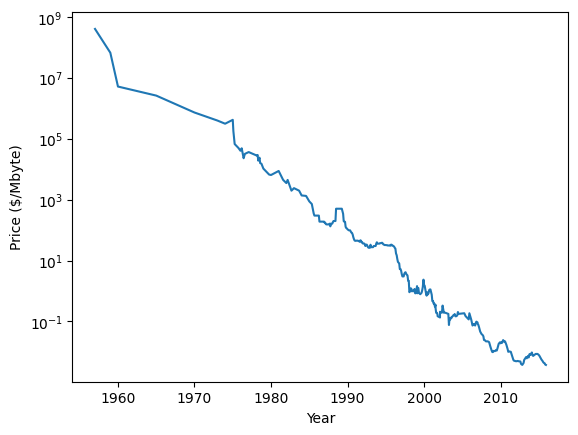

In [135]:
import os


ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price) 
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")
plt.show()


In [142]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.values[:, np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)


X_all = ram_prices.date.values[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

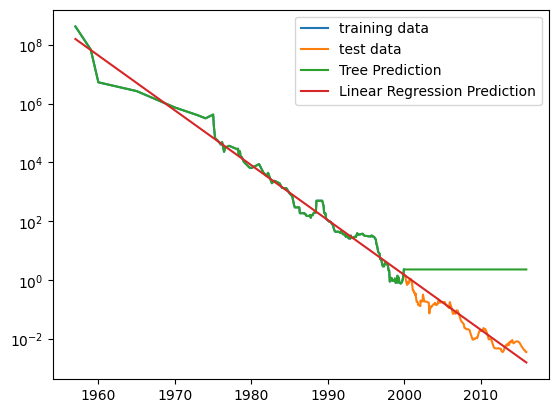

In [145]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()